In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_pickle('../data/train_merged.pkl')

In [23]:
train.shape

(590540, 435)

In [21]:
train.head()

/accounts/masters/quannm/fraud-detection-gnn/venv/lib/python3.13/site-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()
/accounts/masters/quannm/fraud-detection-gnn/venv/lib/python3.13/site-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,Day
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000012
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000799
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.001146
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M,1.001227


In [3]:
train.describe()

/accounts/masters/quannm/fraud-detection-gnn/venv/lib/python3.13/site-packages/pandas/core/nanops.py:1487: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
/accounts/masters/quannm/fraud-detection-gnn/venv/lib/python3.13/site-packages/numpy/_core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/accounts/masters/quannm/fraud-detection-gnn/venv/lib/python3.13/site-packages/pandas/core/nanops.py:731: RuntimeWarning: invalid value encountered in scalar divide
  the_mean = the_sum / count if count > 0 else np.nan
/accounts/masters/quannm/fraud-detection-gnn/venv/lib/python3.13/site-packages/pandas/core/nanops.py:1487: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
/accounts/masters/quannm/fraud-detection-gnn/venv/lib/python3.13/site-packages/numpy/_core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, wh

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
count,5.905400e+05,590540.000000,5.905400e+05,590540.000000,590540.000000,581607.0,588975.0,586281.0,524834.0,524834.0,...,139369.0,4.511300e+04,139318.0,139261.0,5159.00,5169.000000,4747.000000,5132.0000,5163.00000,77586.0
mean,3.282270e+06,0.034990,7.372311e+06,NaN,9898.734658,NaN,NaN,NaN,NaN,NaN,...,NaN,inf,NaN,NaN,inf,inf,12.796875,inf,inf,NaN
std,1.704744e+05,0.183755,4.617224e+06,0.000000,4901.170153,0.0,0.0,0.0,0.0,0.0,...,0.0,1.561523e+00,0.0,0.0,198.75,6.898438,2.371094,97.4375,32.09375,0.0
min,2.987000e+06,0.000000,8.640000e+04,0.250977,1000.000000,100.0,100.0,100.0,100.0,10.0,...,100.0,1.000000e+01,100.0,100.0,100.00,10.000000,11.000000,100.0000,100.00000,0.0
25%,3.134635e+06,0.000000,3.027058e+06,43.312500,6019.000000,214.0,150.0,166.0,204.0,87.0,...,166.0,1.300000e+01,266.0,256.0,252.00,14.000000,11.000000,321.0000,119.00000,24.0
50%,3.282270e+06,0.000000,7.306528e+06,68.750000,9678.000000,361.0,150.0,226.0,299.0,87.0,...,166.0,1.500000e+01,341.0,472.0,252.00,14.000000,11.000000,321.0000,149.00000,24.0
75%,3.429904e+06,0.000000,1.124662e+07,125.000000,14184.000000,512.0,150.0,226.0,330.0,87.0,...,225.0,1.500000e+01,427.0,533.0,486.50,14.000000,15.000000,371.0000,169.00000,32.0
max,3.577539e+06,1.000000,1.581113e+07,31936.000000,18396.000000,600.0,231.0,237.0,540.0,102.0,...,229.0,2.900000e+01,671.0,661.0,854.00,44.000000,26.000000,548.0000,216.00000,32.0


In [11]:
train.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object', length=434)

Fraud Rate: 3.4990%
Total Fraud Cases: 20663


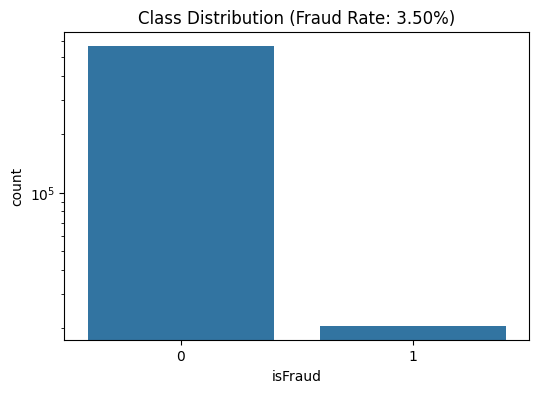

In [25]:
fraud_count = train['isFraud'].sum()
total_count = len(train)
fraud_rate = fraud_count / total_count


print(f"Fraud Rate: {fraud_rate:.4%}")
print(f"Total Fraud Cases: {fraud_count}")

plt.figure(figsize=(6, 4))

sns.countplot(x='isFraud', data=train)
plt.title(f'Class Distribution (Fraud Rate: {fraud_rate:.2%})')
plt.yscale('log')
plt.show()

Time Span: 182.0 days


(0.0, 182.99920138888888)

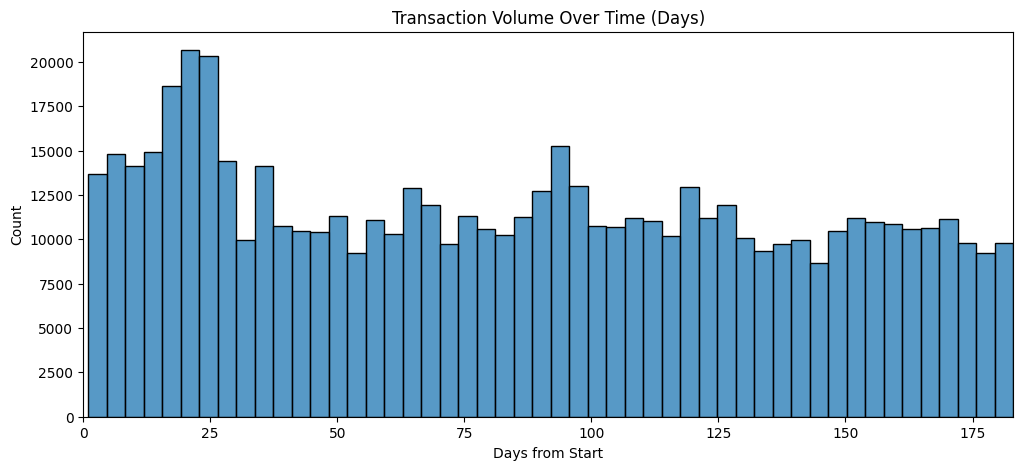

In [17]:
train['Day'] = train['TransactionDT'] / (24 * 60 * 60)
time_span = train['Day'].max() - train['Day'].min()

print(f"Time Span: {time_span:.1f} days")

plt.figure(figsize=(12, 5))
sns.histplot(train['Day'], bins=50, kde=False)
plt.title('Transaction Volume Over Time (Days)')
plt.xlabel('Days from Start')
plt.xlim(0, train['Day'].max())

In [19]:
key_cols = ['TransactionAmt', 'card1', 'dist1', 'P_emaildomain', 'DeviceInfo', 'id_01']
missing_props = train[key_cols].isnull().mean()

print(missing_props.sort_values(ascending=False))

DeviceInfo        0.799055
id_01             0.755761
dist1             0.596524
P_emaildomain     0.159949
TransactionAmt    0.000000
card1             0.000000
dtype: float64


In [20]:
cat_cols = ['card1', 'P_emaildomain', 'DeviceInfo', 'id_30', 'id_31']
for c in cat_cols:
    if c in train.columns:
        print(f"{c}: {train[c].nunique()} unique values")

card1: 13553 unique values
P_emaildomain: 59 unique values
DeviceInfo: 1786 unique values
id_30: 75 unique values
id_31: 130 unique values


In [4]:
train = train.sort_values('TransactionDT')

n = len(train)
train_end = int(n * 0.70)
val_end = int(n * 0.85)

train_df = train.iloc[:train_end]
val_df = train.iloc[train_end:val_end]
test_df = train.iloc[val_end:]

print(f"Training Data:   {train_df.shape[0]} rows (0% - 70%)")
print(f"Validation Data: {val_df.shape[0]} rows (70% - 85%)")
print(f"Test Data:     {test_df.shape[0]} rows (85% - 100%)")

target = 'isFraud'
drop_cols = [target, 'TransactionDT', 'TransactionID']

X_train = train_df.drop(columns=drop_cols, errors='ignore')
y_train = train_df[target]

X_val = val_df.drop(columns=drop_cols, errors='ignore')
y_val = val_df[target]

X_test = test_df.drop(columns=drop_cols, errors='ignore')
y_test = test_df[target]

print(f"X_train: {X_train.shape} | y_train: {y_train.shape}")
print(f"X_val:   {X_val.shape}   | y_val:   {y_val.shape}")
print(f"X_test:  {X_test.shape}  | y_test:  {y_test.shape}")

Training Data:   413378 rows (0% - 70%)
Validation Data: 88581 rows (70% - 85%)
Test Data:     88581 rows (85% - 100%)
X_train: (413378, 431) | y_train: (413378,)
X_val:   (88581, 431)   | y_val:   (88581,)
X_test:  (88581, 431)  | y_test:  (88581,)


In [5]:
import xgboost as xgb
from sklearn.metrics import roc_auc_score

clf = xgb.XGBClassifier(
    n_estimators=500,       
    max_depth=9,             
    learning_rate=0.05,      
    subsample=0.9,           
    colsample_bytree=0.9,    
    missing=-999,            
    tree_method='hist', 
    early_stopping_rounds=50
    )

print("Preparing data for XGBoost...")

for col in X_train.columns:
    if X_train[col].dtype == 'object':
        X_train[col] = X_train[col].astype('category').cat.codes
        X_val[col] = X_val[col].astype('category').cat.codes

print("Training XGBoost Baseline...")
clf.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],
    verbose=50,              
)

preds = clf.predict_proba(X_val)[:, 1] 
score = roc_auc_score(y_val, preds)
print(f"BASELINE AUC SCORE: {score:.4f}")

Preparing data for XGBoost...
Training XGBoost Baseline...
[0]	validation_0-logloss:0.13849	validation_1-logloss:0.13922
[50]	validation_0-logloss:0.07165	validation_1-logloss:0.09516
[100]	validation_0-logloss:0.06012	validation_1-logloss:0.08967
[150]	validation_0-logloss:0.05406	validation_1-logloss:0.08756
[200]	validation_0-logloss:0.04976	validation_1-logloss:0.08630
[250]	validation_0-logloss:0.04612	validation_1-logloss:0.08544
[300]	validation_0-logloss:0.04306	validation_1-logloss:0.08465
[350]	validation_0-logloss:0.03998	validation_1-logloss:0.08383
[400]	validation_0-logloss:0.03759	validation_1-logloss:0.08343
[450]	validation_0-logloss:0.03515	validation_1-logloss:0.08309
[499]	validation_0-logloss:0.03314	validation_1-logloss:0.08284
BASELINE AUC SCORE: 0.9196



Classification Report:
              precision    recall  f1-score   support

       Legit       0.98      1.00      0.99     85539
       Fraud       0.83      0.37      0.51      3042

    accuracy                           0.98     88581
   macro avg       0.90      0.68      0.75     88581
weighted avg       0.97      0.98      0.97     88581



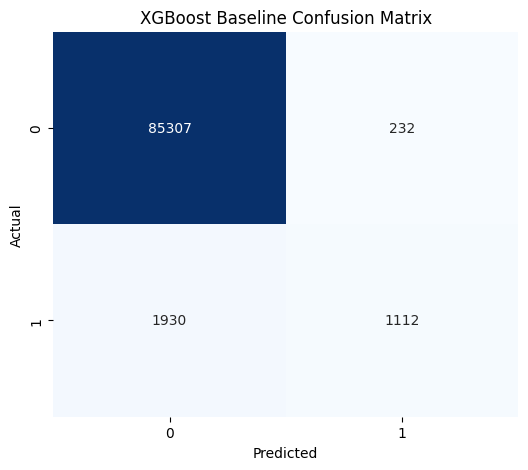

In [17]:
from sklearn.metrics import confusion_matrix, classification_report

preds = clf.predict(X_val)
print("\nClassification Report:")
print(classification_report(y_val, preds, target_names=['Legit', 'Fraud']))

cm = confusion_matrix(y_val, preds)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost Baseline Confusion Matrix')
plt.show()

Plotting Feature Importance...


<Figure size 1200x1000 with 0 Axes>

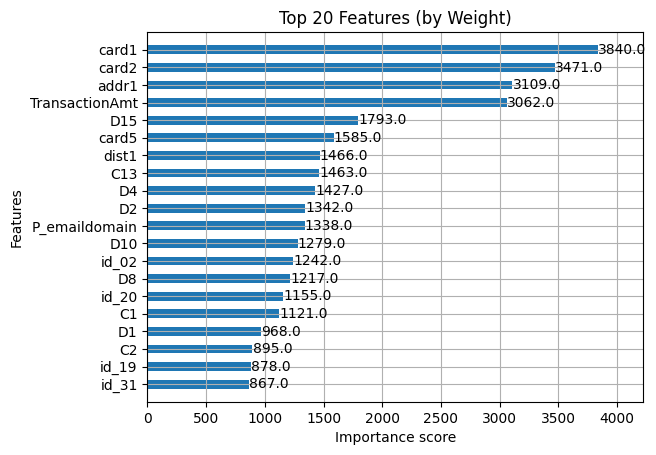

<Figure size 1200x1000 with 0 Axes>

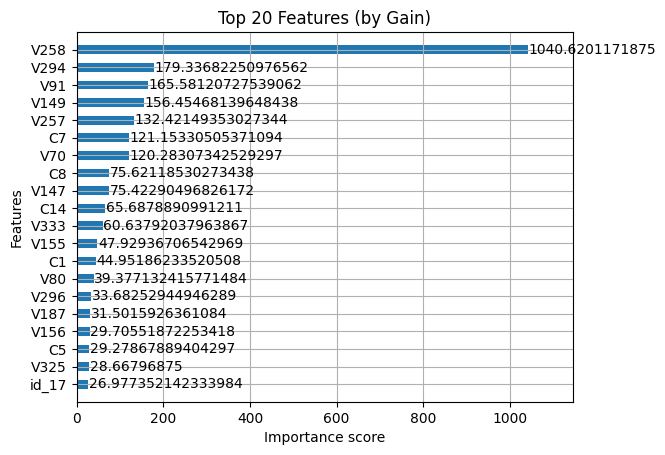

In [6]:
import matplotlib.pyplot as plt

print("Plotting Feature Importance...")

plt.figure(figsize=(12, 10))
xgb.plot_importance(clf, max_num_features=20, importance_type='weight', height=0.5)
plt.title('Top 20 Features (by Weight)')
plt.show()

plt.figure(figsize=(12, 10))
xgb.plot_importance(clf, max_num_features=20, importance_type='gain', height=0.5)
plt.title('Top 20 Features (by Gain)')
plt.show()

In [19]:
ratio = float(np.sum(y_train == 0)) / np.sum(y_train == 1)

clf = xgb.XGBClassifier(
    n_estimators=2000,       
    max_depth=10,            
    learning_rate=0.03,      
    subsample=0.8,           
    colsample_bytree=0.6,    
    scale_pos_weight=ratio,  
    missing=-999,
    random_state=2024,
    tree_method='hist',      
    early_stopping_rounds=50,
    n_jobs=-1
)

clf.fit(
    X_train, y_train,
    eval_set=[(X_train,y_train), (X_val, y_val)],
    verbose=100
)

[0]	validation_0-logloss:0.67885	validation_1-logloss:0.67931
[100]	validation_0-logloss:0.27410	validation_1-logloss:0.34529
[200]	validation_0-logloss:0.20636	validation_1-logloss:0.28503
[300]	validation_0-logloss:0.16928	validation_1-logloss:0.24578
[400]	validation_0-logloss:0.14004	validation_1-logloss:0.21492
[500]	validation_0-logloss:0.11703	validation_1-logloss:0.19034
[600]	validation_0-logloss:0.09874	validation_1-logloss:0.17199
[700]	validation_0-logloss:0.08381	validation_1-logloss:0.15641
[800]	validation_0-logloss:0.07002	validation_1-logloss:0.14179
[900]	validation_0-logloss:0.05953	validation_1-logloss:0.13182
[1000]	validation_0-logloss:0.05069	validation_1-logloss:0.12276
[1100]	validation_0-logloss:0.04228	validation_1-logloss:0.11486
[1200]	validation_0-logloss:0.03566	validation_1-logloss:0.10873
[1300]	validation_0-logloss:0.03039	validation_1-logloss:0.10378
[1400]	validation_0-logloss:0.02605	validation_1-logloss:0.10008
[1500]	validation_0-logloss:0.02217	v

,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,0.6
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",50
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes fro

In [22]:
cols_when_model_built = clf.get_booster().feature_names

X_test_clean = X_test[cols_when_model_built].copy()

from sklearn.preprocessing import OrdinalEncoder

remaining_objects = X_test_clean.select_dtypes(include=['object']).columns

if len(remaining_objects) > 0:
    print(f"Detected {len(remaining_objects)} columns that need encoding to match training data.")
    
    enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
    
    enc.fit(X_train[remaining_objects])
    
    X_test_clean[remaining_objects] = enc.transform(X_test_clean[remaining_objects])

y_test_pred = clf.predict(X_test_clean)
y_test_probs = clf.predict_proba(X_test_clean)[:, 1]


Detected 31 columns that need encoding to match training data.



AUC score: 0.8501
              precision    recall  f1-score   support

       Legit       0.98      1.00      0.99     85498
       Fraud       0.77      0.33      0.46      3083

    accuracy                           0.97     88581
   macro avg       0.87      0.66      0.72     88581
weighted avg       0.97      0.97      0.97     88581



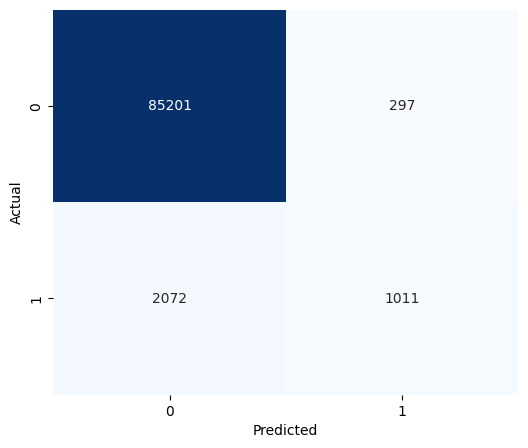

In [25]:
print(f"\nAUC score: {roc_auc_score(y_test, y_test_probs):.4f}")
print(classification_report(y_test, y_test_pred, target_names=['Legit', 'Fraud']))


cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()